# Udacity Nanodegree Project1: Investigate a Dataset - [European Soccer Database] 
### Europe Top 5 League Teams investigation Version.
**Data Analyst** : **Oke** Oladunsi



## Dataset Overview

><br/> This soccer database comes from Kaggle which is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from 11 European countries from 2008 to 2016. 
   > - The database is stored in a SQLite database.which consist of:
   > - +25,000 matches
   > - +10,000 players
   > - 11 European Countries with their lead championship
   > - Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
   > - Seasons 2008 to 2016
   > - Players attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
   > - Betting odds from up to 10 providers
   > - Detailed match events (goal types, possession, corner, cross, fouls, cards etc…)<br/><br/>



## Investigation Overview


><br/> This was my first nanodegree program project, Which is intended to assist budding data analyst develop the skill of questioning (i.e Relevant ones to the problem) from the dataset. Therefore, the questions below where developed initially to assist probe the dataset.
> - What are the top 20 teams with the most goals in the 2009-2010 season in europe top five leagues.
> - What are the top 20 performing teams (per goals conceeded) in european top 5 (five) leagues for the 2009/2010 season.
> -  Are there significance relationships between the amount of home games won and the the team position at the end of the season.
> - Are there any correlations between goals scored and games won per team
><br/><br/>



I hope this piece of work be of assistance to as many aspiring data analyst as possible. Also the scope investigated for this work is limited to Europe top five leagues to allow me do a comprehensive work yet not wearying me out during that includes:
- Spanish Laliga
- English Premier League
- German Budesliga
- Italian Serie A
- French League 1


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# importing necessary packages

# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Standard plotly imports
import chart_studio.plotly.plotly as ply
import plotly.graph_objs as go
from chart_studio.plotly.plotly import iplot

from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# working with matplotlib inline
%matplotlib inline  
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
spain_liga_league_09_10 = pd.read_csv("spain_liga_bbva_2009_2010.csv")
english_premier_league_09_10 = pd.read_csv("england_premier_league_2009_2010.csv")
france_ligue_1_09_10 = pd.read_csv("france_ligue_1_2009_2010.csv")
germany_1_bundesliga_09_10 = pd.read_csv("germany_1._bundesliga_2009_2010.csv")
italy_seria_a_09_10 = pd.read_csv("italy_serie_a_2009_2010.csv")


In [3]:
spain_liga_league_09_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team_id    20 non-null     int64 
 1   team_name  20 non-null     object
 2   GP         20 non-null     int64 
 3   HW         20 non-null     int64 
 4   AW         20 non-null     int64 
 5   HD         20 non-null     int64 
 6   AD         20 non-null     int64 
 7   HL         20 non-null     int64 
 8   AL         20 non-null     int64 
 9   W          20 non-null     int64 
 10  L          20 non-null     int64 
 11  D          20 non-null     int64 
 12  P          20 non-null     int64 
 13  F          20 non-null     int64 
 14  A          20 non-null     int64 
 15  +/-        20 non-null     int64 
dtypes: int64(15), object(1)
memory usage: 2.6+ KB


In [3]:
seasons_09_10 = spain_liga_league_09_10
for league in [english_premier_league_09_10,france_ligue_1_09_10,germany_1_bundesliga_09_10,italy_seria_a_09_10]:
    seasons_09_10 = seasons_09_10.append(league)



In [4]:
seasons_09_10_list = []
for league in [spain_liga_league_09_10,english_premier_league_09_10,france_ligue_1_09_10,germany_1_bundesliga_09_10,italy_seria_a_09_10]:
    league["pos"] = league.index+1
    seasons_09_10_list.append(league)
numeric_colunms = seasons_09_10_list[1].columns[3:]


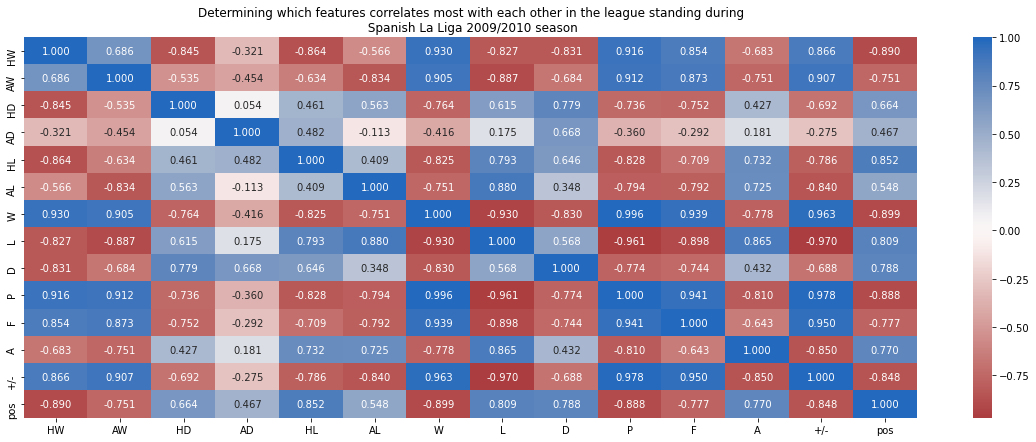

In [8]:
def show_numeric_datapoints_corr():
        plt.figure(figsize = [20, 7])
        sb.heatmap(spain_liga_league_09_10[numeric_colunms].corr(), annot = True, fmt = '.3f',
                cmap = 'vlag_r', center = 0)
        plt.title("Determining which features correlates most with each other in the league standing during\n Spanish La Liga 2009/2010 season")
        plt.show()
        

show_numeric_datapoints_corr()

In [92]:
spain_liga_league_09_10

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,pos
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,1
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2
2,10267,Valencia CF,38,13,8,5,3,1,8,21,9,8,71,59,40,19,3
3,8302,Sevilla FC,38,10,9,6,0,3,10,19,13,6,63,65,49,16,4
4,8661,RCD Mallorca,38,15,3,1,7,3,9,18,12,8,62,59,44,15,5
5,8305,Getafe CF,38,11,6,4,3,4,10,17,14,7,58,58,48,10,6
6,10205,Villarreal CF,38,13,3,3,5,3,11,16,14,8,56,58,57,1,7
7,8315,Athletic Club de Bilbao,38,11,4,4,5,4,10,15,14,9,54,50,53,-3,8
8,9906,Atlético Madrid,38,11,2,3,5,5,12,13,17,8,47,57,61,-4,9
9,9783,RC Deportivo de La Coruña,38,9,4,4,4,6,11,13,17,8,47,35,49,-14,10


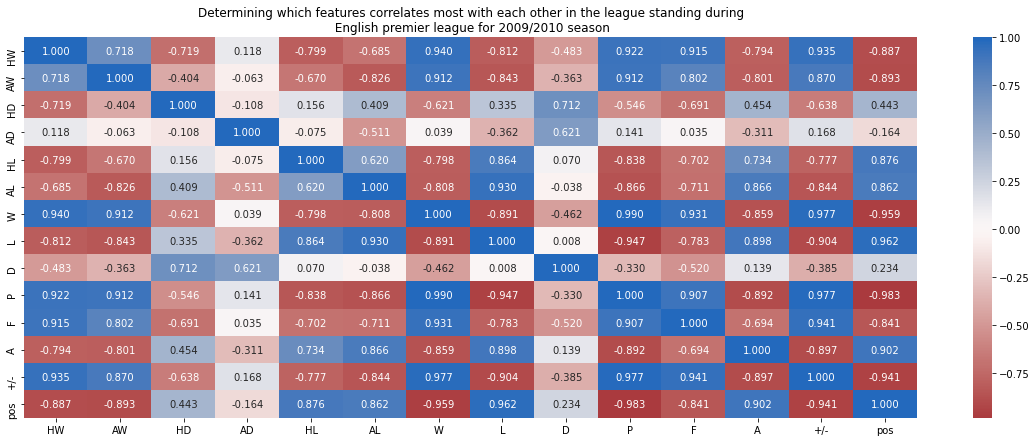

In [85]:
def show_numeric_datapoints_corr():
        plt.figure(figsize = [20, 7])
        sb.heatmap(english_premier_league_09_10[numeric_colunms].corr(), annot = True, fmt = '.3f',
                cmap = 'vlag_r', center = 0)
        plt.title("Determining which features correlates most with each other in the league standing during\n English premier league for 2009/2010 season")
        plt.show()
        

show_numeric_datapoints_corr()

In [93]:
english_premier_league_09_10

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,pos
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,1
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42,3
3,8586,Tottenham Hotspur,38,14,7,2,5,3,7,21,10,7,70,67,41,26,4
4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28,5
5,10252,Aston Villa,38,8,9,8,5,3,5,17,8,13,64,52,39,13,6
6,8650,Liverpool,38,13,5,3,6,3,8,18,11,9,63,61,35,26,7
7,8668,Everton,38,11,5,6,7,2,7,16,9,13,61,60,49,11,8
8,8658,Birmingham City,38,8,5,9,2,2,12,13,14,11,50,38,47,-9,9
9,8655,Blackburn Rovers,38,10,3,6,5,3,11,13,14,11,50,41,55,-14,10


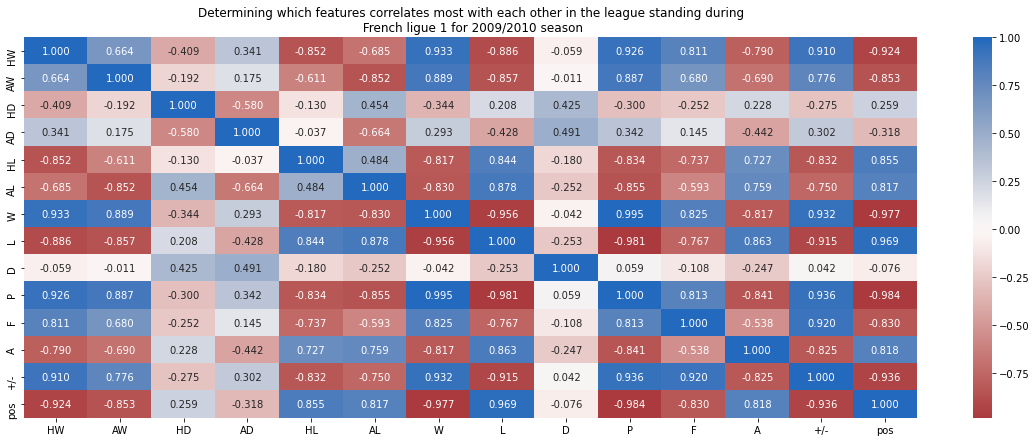

In [88]:
def show_numeric_datapoints_corr():
        plt.figure(figsize = [20, 7])
        sb.heatmap(france_ligue_1_09_10[numeric_colunms].corr(), annot = True, fmt = '.3f',
                cmap = 'vlag_r', center = 0)
        plt.title("Determining which features correlates most with each other in the league standing during\n French ligue 1 for 2009/2010 season")
        plt.show()
        

show_numeric_datapoints_corr()

In [94]:
france_ligue_1_09_10

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,pos
0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33,1
1,9748,Olympique Lyonnais,38,12,8,4,8,3,3,20,6,12,72,64,38,26,2
2,8583,AJ Auxerre,38,11,9,5,6,3,4,20,7,11,71,42,29,13,3
3,8639,LOSC Lille,38,14,7,3,4,2,8,21,10,7,70,72,40,32,4
4,10249,Montpellier Hérault SC,38,12,8,4,5,3,6,20,9,9,69,50,40,10,5
5,9827,Girondins de Bordeaux,38,12,7,4,3,3,9,19,12,7,64,58,40,18,6
6,8689,FC Lorient,38,10,6,7,3,2,10,16,12,10,58,54,42,12,7
7,9829,AS Monaco,38,11,4,5,5,3,10,15,13,10,55,39,45,-6,8
8,9851,Stade Rennais FC,38,10,4,4,7,5,8,14,13,11,53,52,41,11,9
9,9873,Valenciennes FC,38,7,7,7,3,5,9,14,14,10,52,50,50,0,10


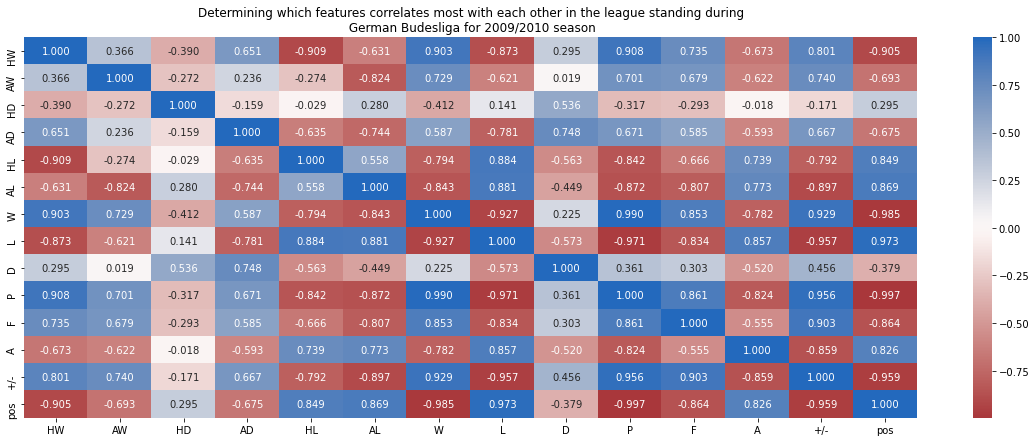

In [90]:
def show_numeric_datapoints_corr():
        plt.figure(figsize = [20, 7])
        sb.heatmap(germany_1_bundesliga_09_10[numeric_colunms].corr(), annot = True, fmt = '.3f',
                cmap = 'vlag_r', center = 0)
        plt.title("Determining which features correlates most with each other in the league standing during\n German Budesliga for 2009/2010 season")
        plt.show()
        

show_numeric_datapoints_corr()

In [95]:
germany_1_bundesliga_09_10

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,pos
0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41,1
1,10189,FC Schalke 04,34,11,8,2,6,4,3,19,7,8,65,53,31,22,2
2,8697,SV Werder Bremen,34,8,9,6,4,3,4,17,7,10,61,71,40,31,3
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,4
4,9789,Borussia Dortmund,34,10,6,4,5,3,6,16,9,9,57,54,42,12,5
5,10269,VfB Stuttgart,34,8,7,5,5,4,5,15,9,10,55,51,41,10,6
6,9790,Hamburger SV,34,8,5,6,7,3,5,13,8,13,52,56,41,15,7
7,8721,VfL Wolfsburg,34,7,7,2,6,8,4,14,12,8,50,64,58,6,8
8,9905,1. FSV Mainz 05,34,9,3,6,5,2,9,12,11,11,47,36,42,-6,9
9,9810,Eintracht Frankfurt,34,7,5,5,5,5,7,12,12,10,46,47,54,-7,10


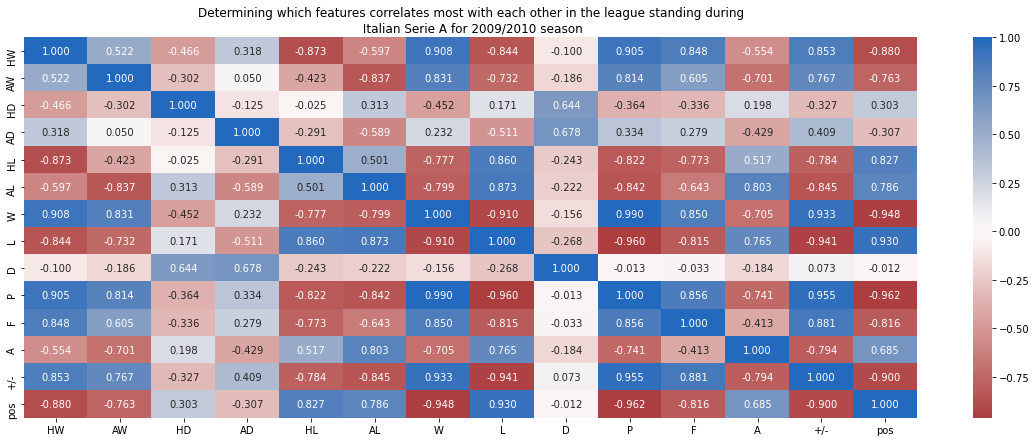

In [91]:
def show_numeric_datapoints_corr():
        plt.figure(figsize = [20, 7])
        sb.heatmap(italy_seria_a_09_10[numeric_colunms].corr(), annot = True, fmt = '.3f',
                cmap = 'vlag_r', center = 0)
        plt.title("Determining which features correlates most with each other in the league standing during\n Italian Serie A for 2009/2010 season")
        plt.show()

show_numeric_datapoints_corr()

In [96]:
italy_seria_a_09_10

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,pos
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1
1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27,2
2,8564,Milan,38,12,8,5,5,2,6,20,8,10,70,60,39,21,3
3,9882,Sampdoria,38,13,6,6,4,0,9,19,9,10,67,49,41,8,4
4,8540,Palermo,38,13,5,6,5,0,9,18,9,11,65,59,47,12,5
5,9875,Napoli,38,9,6,8,6,2,7,15,9,14,59,50,43,7,6
6,9885,Juventus,38,9,7,4,3,6,9,16,15,7,55,55,56,-1,7
7,10167,Parma,38,10,4,4,6,5,9,14,14,10,52,46,51,-5,8
8,10233,Genoa,38,11,3,5,4,3,12,14,15,9,51,57,61,-4,9
9,9976,Bari,38,11,2,4,7,4,10,13,14,11,50,49,49,0,10


## Notes for Initial Visualizations 
#### The essence of heatmap above is to assist me investigate how each league features in the 5 leagues affect team position at the end of a season.
><br/> Except for **Spanish La Liga**, games drawn in other leagues isn't significant to team eventual position.<br/>
> - Goals conceeded (A) is positively correlated to team positon i.e the more goals a team conceedes the greater the chances of the team been relegated.
> - Goal scored (F) is negatively correlated to team positon i.e the more goals a team scores the greater the chances of the team qualifying for champions league. 
> - The amount of points accumulated by a team is negatively correlated to where
> - The games won by a team (HomeWin or AwayWin) is negatively correlated to team position at the end of the season i.e the more matches a team wins determines where team position at the end of season.<br/><br/>

**NB** NEGATIVITY AND POSITIVITY IN HEATMAP LOOKS ABSURD DUE TO TEAM POSITION WHERE 1-4(NEGATIVE) REPRESENTS CHAMPIONS LEAGUE SPOTS WHILE 18-20(POSITIVE) REPRESENTS RELEGATED TEAMS: This is caused by the arrangement of teams from the least number which is 1st (for the winner of their respective league and team with most points throughout the season) whilst 20th represent team with the least point and eventually last place team in the league.

In [40]:
league_name = ["Spanish Laliga","English premier league","French Ligue 1","German Budesliga","Italian Serie A"]
for league,Standings in zip(league_name,seasons_09_10_list):
    #print(league["F"])
    print(league)

    print("Home Win:",Standings["HW"].sum())

    print("Away Win:",Standings["AW"].sum())
    
    #print(Standings["F"].sum()*100/(Standings["GP"].sum()))


    #print(league["+/-"].sum())
    print("*"*10)

Spanish Laliga
Home Win: 194
Away Win: 91
**********
English premier league
Home Win: 193
Away Win: 91
**********
French Ligue 1
Home Win: 179
Away Win: 104
**********
German Budesliga
Home Win: 125
Away Win: 95
**********
Italian Serie A
Home Win: 186
Away Win: 92
**********


In [5]:
seasons_09_10["Goals_scored_ratio_per_match"] =round(seasons_09_10["F"]/seasons_09_10["GP"],2)
seasons_09_10["Goals_conceeded_ratio_per_match"] = round(seasons_09_10["A"]/seasons_09_10["GP"],2)

># Goals
> #### In this gaining insights on how Europe's top sides performs using the amount of goals scored and conceeded for the 2009-2010 season.

In [9]:
# YOUR CODE HERE
def avg_scored_per_game(): 
   
    
    seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21].iplot(kind='bar',x="team_name", y="Goals_scored_ratio_per_match", xTitle='teams',
                  yTitle='Avg. goals scored per match', title='Europe\'s top 20 teams with Average goals scored per match for 09/10 season')
    
    
avg_scored_per_game()

In [7]:
def standing(text):
    if text == 1:
        return "{}st".format(text)
    if text == 2:
        return "{}nd".format(text)
    if text == 3:
        return "{}rd".format(text)
    return "{}th".format(text)

> <br/>   most teams with greater than 1.5 chance of scoring (more a goal) in a match end up in the european competion zones(Champions League or Europa League).<br/> <br/> 


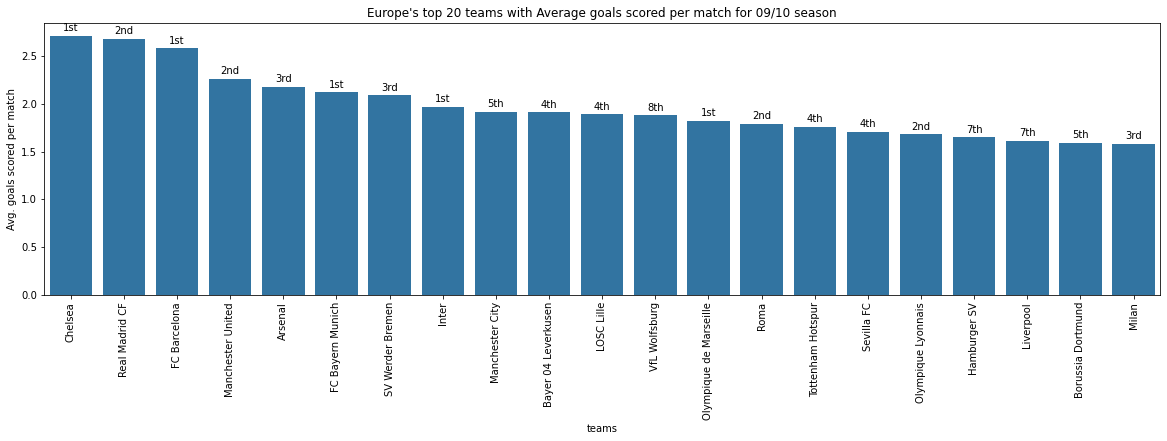

In [46]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[20,5])
sb.barplot(data=seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21],x="team_name", y="Goals_scored_ratio_per_match",color=base_color, ci='sd')
plt.title('Europe\'s top 20 teams with Average goals scored per match for 09/10 season')
plt.ylabel("Avg. goals scored per match")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=90)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21]["Goals_scored_ratio_per_match"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.05,vpct_string,ha="center",color="black")

In [6]:
seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42,2.18,1.08
0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41,2.12,0.91
2,8697,SV Werder Bremen,34,8,9,6,4,3,4,17,7,10,61,71,40,31,2.09,1.18
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28,1.92,1.18
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,1.91,1.12


- Chelsea Fc scored the most goal of the season with 103 goals in all of europe top five leagues.
- In the Spanish Laliga Real Madrid scored the most goals with 102 goals.
- In Serie A both inter milan scored the most goals with 75 goals
- In french ligue 1 LOSC Lille scored the most goals with 72 goals.
- FC Bayern Munich scored the most goals with 72 goals in the german bundesliga

In [ ]:
seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21]

In [9]:
round(np.average(seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21].index),2)

2.33

In [10]:
round(seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21]["Goals_scored_ratio_per_match"].mean(),2)

1.97

><br/>  most teams with greater than 1.5 chance of conceeding in a match end up in the relegation zone or eventually get relegated. <br/><br/>


In [11]:
# YOUR CODE HERE
def avg_conceeded_per_game(): 
    
    seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=False)[:21].iplot(kind='bar',x="team_name", y="Goals_conceeded_ratio_per_match", xTitle='teams',
                  yTitle='Avg. goals conceeded per match', title='Europe\'s 20 worst conceeding teams with Average goals conceeded per match for 09/10 season')

avg_conceeded_per_game()

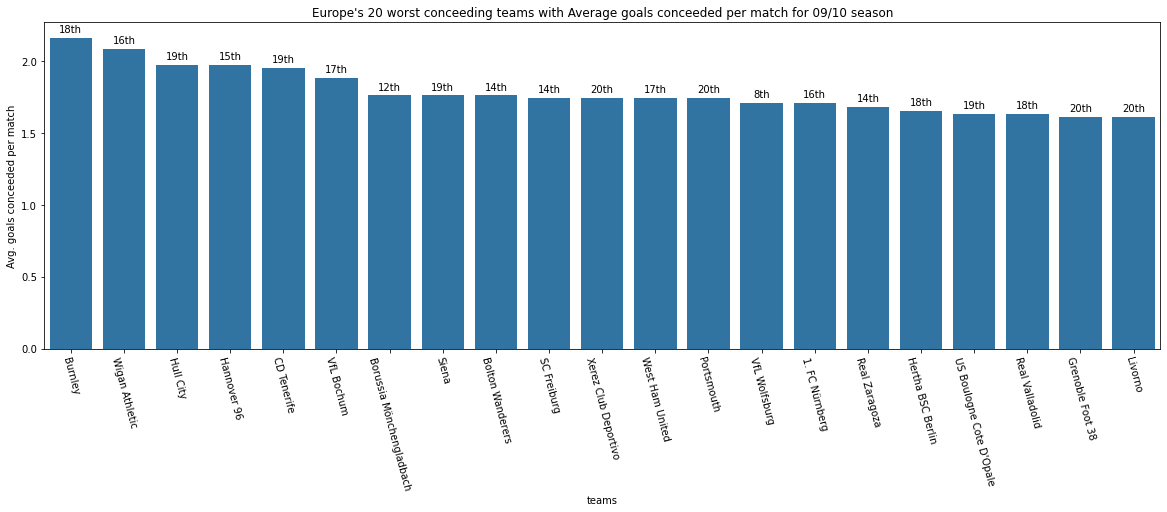

In [10]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=False)[:21],x="team_name", y="Goals_conceeded_ratio_per_match",color=base_color, ci='sd')
plt.title('Europe\'s 20 worst conceeding teams with Average goals conceeded per match for 09/10 season')
plt.ylabel("Avg. goals conceeded per match")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=False)[:21]["Goals_conceeded_ratio_per_match"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.04,vpct_string,ha="center",color="black")

In [16]:
seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40,1.11,2.16
15,8528,Wigan Athletic,38,6,3,7,2,6,14,9,20,9,36,37,79,-42,0.97,2.08
18,8667,Hull City,38,6,0,6,6,7,13,6,20,12,30,34,75,-41,0.89,1.97
14,9904,Hannover 96,34,5,4,4,2,8,11,9,19,6,33,43,67,-24,1.26,1.97
18,9867,CD Tenerife,38,8,1,6,3,5,15,9,20,9,36,40,74,-34,1.05,1.95
16,9911,VfL Bochum,34,2,4,6,4,9,9,6,18,10,28,33,64,-31,0.97,1.88
11,9788,Borussia Mönchengladbach,34,8,2,5,4,4,11,10,15,9,39,43,60,-17,1.26,1.76
18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27,1.05,1.76
13,8559,Bolton Wanderers,38,6,4,6,3,7,12,10,19,9,39,42,67,-25,1.11,1.76
13,8358,SC Freiburg,34,5,4,4,4,8,9,9,17,8,35,35,59,-24,1.03,1.74


- In the Epl Burnley Fc conceeded the most goals with 82 goals.
- In Serie A Siena conceeded the most goals with 67 goals.
- In french ligue 1 US Boulogne Cote D'Opale top the list in france with the the most goals conceeded with 62 goals.
- Hannover 96 conceeded the most goals with 67 goals in the German Bundesliga.
- In Spanish Laliga CD Tenerife conceeded the most goals with 74 goals.
> <br/> in all of europe Burnley Fc is the worst defending team  with a goal conceeding rate of 2.16 goal per match.<br/><br/>

In [12]:
# YOUR CODE HERE
def avg_conceeded_per_game(): 
    
    seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=True)[:21].iplot(kind='bar',x="team_name", y="Goals_conceeded_ratio_per_match", xTitle='teams',
                  yTitle='Avg. goals conceeded per match', title='Europe\'s top 20 teams with Average goals conceeded per match for 09/10 season ')

avg_conceeded_per_game()

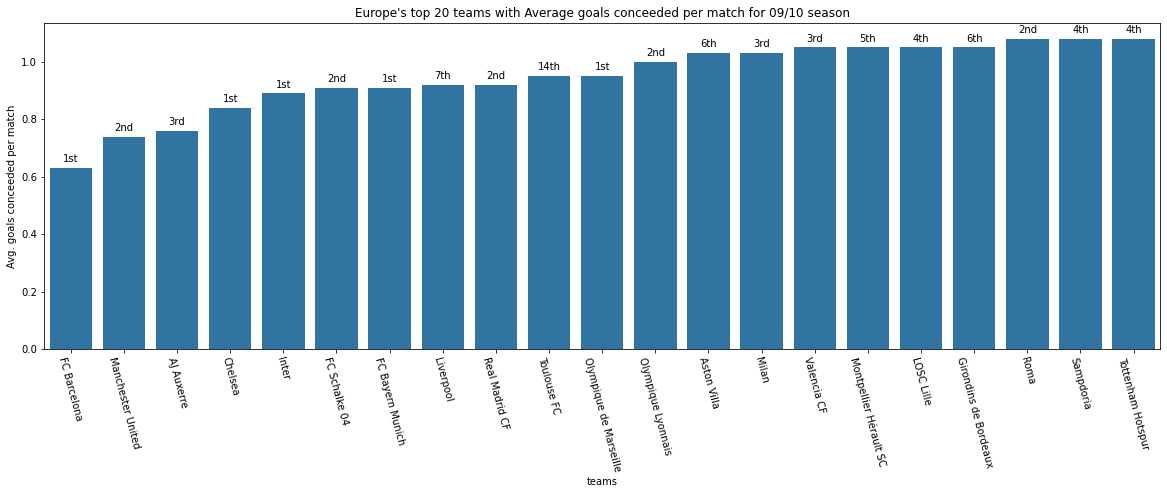

In [64]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=True)[:21],x="team_name", y="Goals_conceeded_ratio_per_match",color=base_color, ci='sd')
plt.title('Europe\'s top 20 teams with Average goals conceeded per match for 09/10 season')
plt.ylabel("Avg. goals conceeded per match")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=True)[:21]["Goals_conceeded_ratio_per_match"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.02,vpct_string,ha="center",color="black")

In [15]:
seasons_09_10.sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
2,8583,AJ Auxerre,38,11,9,5,6,3,4,20,7,11,71,42,29,13,1.11,0.76
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
1,10189,FC Schalke 04,34,11,8,2,6,4,3,19,7,8,65,53,31,22,1.56,0.91
0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41,2.12,0.91
6,8650,Liverpool,38,13,5,3,6,3,8,18,11,9,63,61,35,26,1.61,0.92
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
13,9941,Toulouse FC,38,8,4,4,7,7,8,12,15,11,47,36,36,0,0.95,0.95


- In the Epl Man Utd conceeded the least amount of goals with 28 goals.
- In Serie A Inter Milan conceeded the least amount of goals with 34 goals.
- In french ligue 1 Auxerre the least number of goals conceeded with 29 goals.
- FC Schalke 04 and FC Bayern Munich both conceeded joint least amount of goals in the German Bundesliga.
- In Spanish Laliga FC Barcelona conceeded the least number of goals with 24 goals.
> <br/> in all of europe FC Barcelona is the best defending team  with a goal conceeding rate of 0.63 goal per match..<br/><br/>

In [13]:
top_teams_with_most_goals_scored_less_goals_conceeded_09_10 = seasons_09_10[["Goals_scored_ratio_per_match","Goals_conceeded_ratio_per_match","team_name"]].sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21].set_index("team_name")


top_teams_with_most_goals_scored_less_goals_conceeded_09_10.iplot(kind='bar', xTitle='teams',
                  yTitle='goals scored/conceeded', title='Top 20 teams in europe (Compare goals scored vs goals conceded in europe 09/10')


In [27]:
top_teams_with_most_goals_scored_less_goals_conceeded_09_10 = seasons_09_10[["Goals_scored_ratio_per_match","Goals_conceeded_ratio_per_match","team_name"]].sort_values(by=["Goals_conceeded_ratio_per_match"], ascending=False)[:21].set_index("team_name")


top_teams_with_most_goals_scored_less_goals_conceeded_09_10.iplot(kind='bar', xTitle='teams',
                  yTitle='goals scored/conceeded', title='20 Worst teams in europe (Compare goals scored vs goals conceded in europe 09/10')

In [22]:

seasons_09_10.sort_values(by=["Goals_scored_ratio_per_match"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42,2.18,1.08
0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41,2.12,0.91
2,8697,SV Werder Bremen,34,8,9,6,4,3,4,17,7,10,61,71,40,31,2.09,1.18
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28,1.92,1.18
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,1.91,1.12


## Notes/Facts from the bar-chart Visualizations On Goals Scored and Conceeded
#### The essence of bar-charts above is to assist me and others have a clear understanding of how the teams in the top 5 leagues perform using goals scored per match and goals conceeded per match.
><br/> Except for **Wolfburg**.<br/>
> - most teams with greater than 1.5 chance of scoring (more a goal) in a match end up in the european competion zones(Champions League or Europa League).
> - most teams with greater than 1.5 chance of conceeding in a match end up in the relegation zone or eventually get relegated. 
> - in all of europe Chelsea Fc is the most potent attacking side with close to 3 goals per match (2.71).
> - in all of europe FC Barcelona is the best defending team  with a goal conceeding rate of 0.63 goal per match.
> - in all of europe Burnley Fc is the worst defending team with goal conceeding rate of 2.16 goal per match.<br/><br/>


**FURTHER AHEAD :** THE NEXT SLIDES INCLUDES CHARTS FOR WINS, DRAWS AND LOSES AMONGST EUROPEAN TOP SIDES

# Wins
#### In this section we will be gaining insights on how Europe's top sides performs using the amount of games won in the 2009-2010 season. Games won in their respective stadiums and and those won in their opponent stadium will also be observed

In [18]:
seasons_09_10.sort_values(by=["HW"], ascending=True)[:21].iplot(kind='bar',x="team_name",y="HW", xTitle='teams',
                  yTitle='goals scored/conceeded', title='20 European teams with least home wins in the 09/10 season')

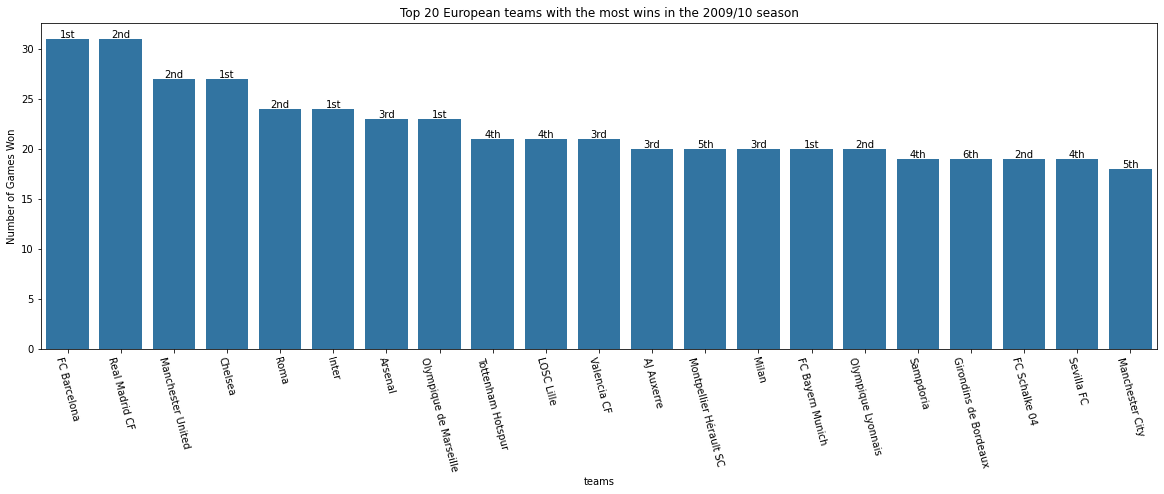

In [11]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["W"], ascending=False)[:21],x="team_name", y="W",color=base_color)
plt.title('Top 20 European teams with the most wins in the 2009/10 season')
plt.ylabel("Number of Games Won")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["W"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["W"], ascending=False)[:21]["W"]):
    vpct_string = "{}".format(standing(position+1))
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [14]:
seasons_09_10.sort_values(by=["W"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27,1.79,1.08
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42,2.18,1.08
0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33,1.82,0.95
3,8586,Tottenham Hotspur,38,14,7,2,5,3,7,21,10,7,70,67,41,26,1.76,1.08
3,8639,LOSC Lille,38,14,7,3,4,2,8,21,10,7,70,72,40,32,1.89,1.05


- The chart above shows that we have 2 teams with equal Total number of games won in FC Barcelona and Real Madrid CF with (31) wins
- In the Epl Man Utd and chelsea fc perform better in total matches won than all other teams in England by winning (27) matches each
- In Serie A both roma and inter milan both won same numbers of games each (24)
- In french ligue 1 Olympique de Marseille perform best among other teams in france with (21) games.
- FC Bayern Munich perform best among other teams in German Budesliga with (20) games

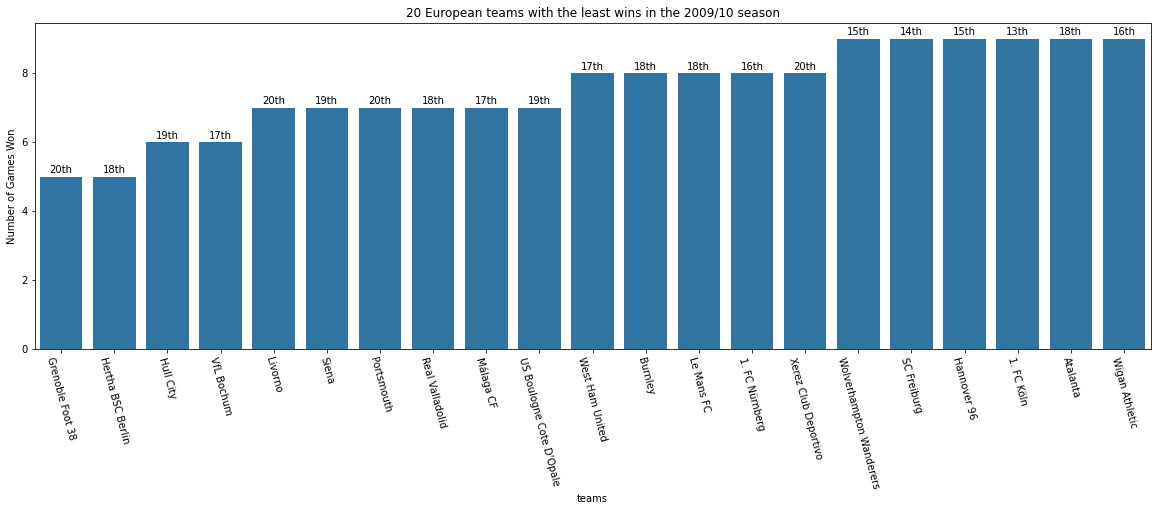

In [12]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["W"], ascending=True)[:21],x="team_name", y="W",color=base_color)
plt.title('20 European teams with the least wins in the 2009/10 season')
plt.ylabel("Number of Games Won")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["W"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["W"], ascending=True)[:21]["W"]):
    vpct_string = "{}".format(standing(position+1))
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [7]:
seasons_09_10.sort_values(by=["W"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30,0.82,1.61
17,8177,Hertha BSC Berlin,34,1,4,6,3,10,10,5,20,9,24,34,56,-22,1.00,1.65
18,8667,Hull City,38,6,0,6,6,7,13,6,20,12,30,34,75,-41,0.89,1.97
16,9911,VfL Bochum,34,2,4,6,4,9,9,6,18,10,28,33,64,-31,0.97,1.88
19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34,0.71,1.61
18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27,1.05,1.76
19,8462,Portsmouth,38,5,2,3,4,11,13,7,24,7,28,34,66,-32,0.89,1.74
17,10281,Real Valladolid,38,4,3,8,7,7,9,7,16,15,36,37,62,-25,0.97,1.63
16,9864,Málaga CF,38,5,2,8,8,6,9,7,15,16,37,42,48,-6,1.11,1.26
18,4170,US Boulogne Cote D'Opale,38,4,3,5,5,10,11,7,21,10,31,31,62,-31,0.82,1.63


- The chart above shows that we have 2 teams with least equal amount of games won in Grenoble Foot 38(france) and Hertha BSC Berlin(germany) with (5) games each
- Grenoble Foot 38 is team with the least amount of games won in the french ligue 1
- In the Epl Hull city perform least in total numbers of matches won than all other teams in England by winning (6) matches.
- In Serie A both Livorno and Siena won the least numbers of games (7)
- In spanish la liga  Real Valadolid and Malaga perform least among other teams in spain with (7) games.
- Hertha BSC Berlin perform least among the teams in the German Budesliga with (5) games
><br/>  Hence most of the teams in this category were relegated<br/><br/>

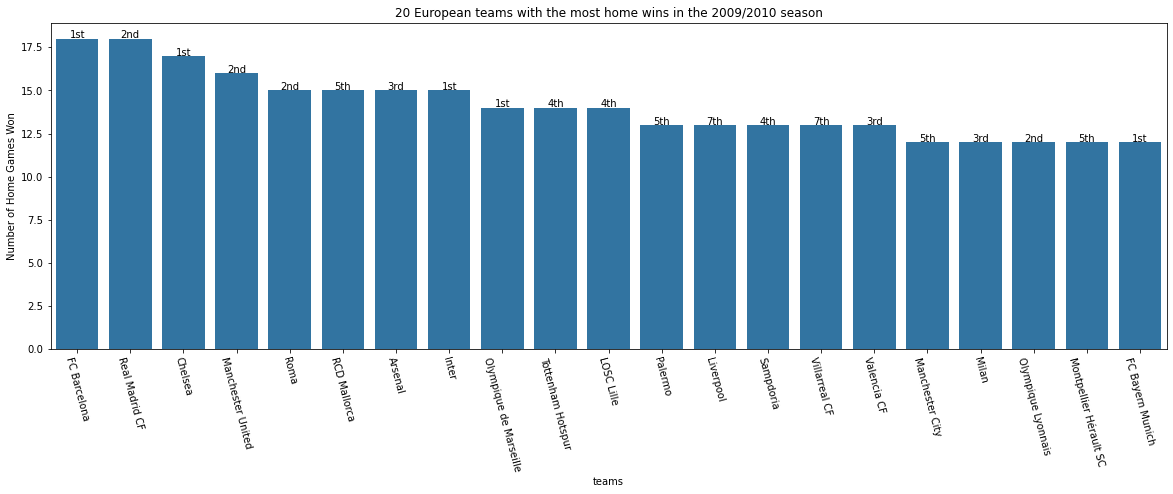

In [14]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["HW"], ascending=False)[:21],x="team_name", y="HW",color=base_color)
plt.title('20 European teams with the most home wins in the 2009/2010 season')
plt.ylabel("Number of Home Games Won")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["HW"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["HW"], ascending=False)[:21]["HW"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.02,vpct_string,ha="center",color="black")

In [12]:
seasons_09_10.sort_values(by=["HW"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27,1.79,1.08
4,8661,RCD Mallorca,38,15,3,1,7,3,9,18,12,8,62,59,44,15,1.55,1.16
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42,2.18,1.08
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33,1.82,0.95
3,8586,Tottenham Hotspur,38,14,7,2,5,3,7,21,10,7,70,67,41,26,1.76,1.08


- The chart above shows that we have 2 teams with equal Home number of games won in FC Barcelona and Real Madrid CF with (18) wins.
- In the Epl on like total matches won chelsea fc perform better in home matches than all other teams in England by winning (17) matches.
- In Serie A both roma and inter milan both won same numbers of games each (15).
- In french ligue 1 Olympique de Marseille and LOSC Lille have same numbers of home games won in france with (14) games.
- FC Bayern Munich perform best among other teams in German Budesliga by winning (12) home games.

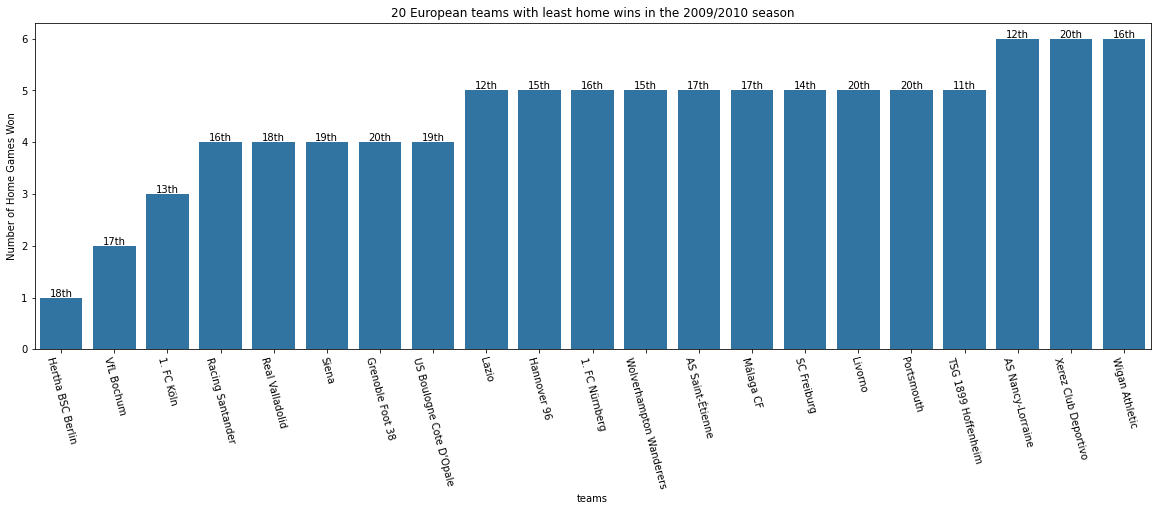

In [15]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["HW"], ascending=True)[:21],x="team_name", y="HW",color=base_color)
plt.title('20 European teams with least home wins in the 2009/2010 season')
plt.ylabel("Number of Home Games Won")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["HW"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["HW"], ascending=True)[:21]["HW"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.02,vpct_string,ha="center",color="black")

In [8]:
seasons_09_10.sort_values(by=["HW"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
17,8177,Hertha BSC Berlin,34,1,4,6,3,10,10,5,20,9,24,34,56,-22,1.00,1.65
16,9911,VfL Bochum,34,2,4,6,4,9,9,6,18,10,28,33,64,-31,0.97,1.88
12,8722,1. FC Köln,34,3,6,6,5,8,6,9,14,11,38,33,42,-9,0.97,1.24
15,8696,Racing Santander,38,4,5,5,7,10,7,9,17,12,39,42,59,-17,1.11,1.55
17,10281,Real Valladolid,38,4,3,8,7,7,9,7,16,15,36,37,62,-25,0.97,1.63
18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27,1.05,1.76
19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30,0.82,1.61
18,4170,US Boulogne Cote D'Opale,38,4,3,5,5,10,11,7,21,10,31,31,62,-31,0.82,1.63
11,8543,Lazio,38,5,6,6,7,8,6,11,14,13,46,39,43,-4,1.03,1.13
14,9904,Hannover 96,34,5,4,4,2,8,11,9,19,6,33,43,67,-24,1.26,1.97


- The chart above shows that top 3 teams with the least amount of Home win matches in all of europe are from germany (Hertha BSC Berlin (1), VFL Bochum (2), 1.FC Koln (3)).
- In the Epl on like total matches won Wolverhampton Wanderers and Porstmouth perform least in home matches amongst teams in England by winning (5) matches.
- In Serie A Siena perform least in home matches amongst teams in England by winning (4) matches.
- In french ligue 1 Grenoble Foot 38 and US Boulogne Cote D'Opale have both joint least amount of home games wins in france with (4) games.
- Racing Santander and Real Valadolid perform least in Home games by winning joint lowest in Spanish Laliga (4) home games.

><br/> Hertha BSC Berlin Has the overall worst performance in Home matches in all of europe <br/><br/>

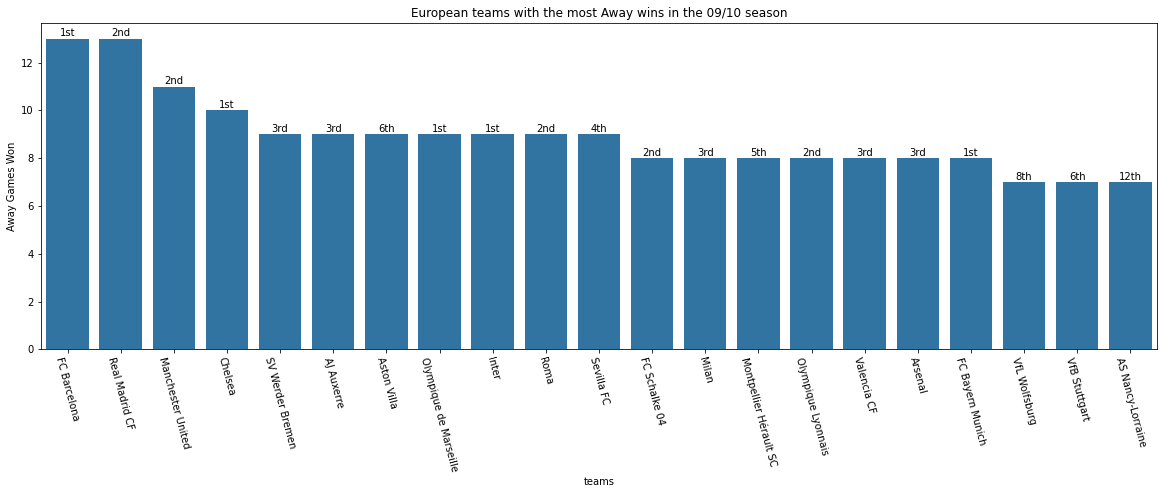

In [21]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["AW"], ascending=False)[:21],x="team_name", y="AW",color=base_color)
plt.title('European teams with the most Away wins in the 09/10 season')
plt.ylabel("Away Games Won")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["AW"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["AW"], ascending=False)[:21]["AW"]):
    vpct_string = "{}".format(standing(position+1))
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [9]:
seasons_09_10.sort_values(by=["AW"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
2,8697,SV Werder Bremen,34,8,9,6,4,3,4,17,7,10,61,71,40,31,2.09,1.18
2,8583,AJ Auxerre,38,11,9,5,6,3,4,20,7,11,71,42,29,13,1.11,0.76
5,10252,Aston Villa,38,8,9,8,5,3,5,17,8,13,64,52,39,13,1.37,1.03
0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33,1.82,0.95
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27,1.79,1.08


- The chart above shows that we have 2 teams with joint most Away wins in FC Barcelona and Real Madrid CF with (13) each.
- In the Epl on like total matches won and Home matches won Man Utd fc perform better in Away matches than all other teams in England by winning (11) matches.
- In Serie A both roma and inter milan both won same numbers of games each (7).
- In french ligue 1 AJ Auxerre and Olympique de Marseille both have same numbers of Away games won in france with (7) games.
- SV Werder Bremen perform best amongst the teams in the German Bundesliga by winning (7) Away games.

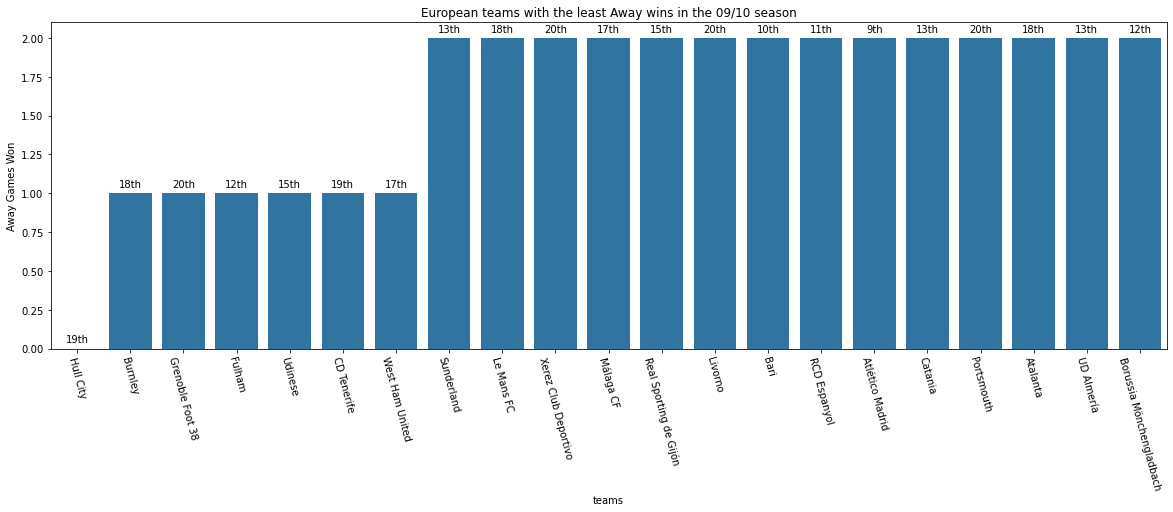

In [22]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["AW"], ascending=True)[:21],x="team_name", y="AW",color=base_color)
plt.title('European teams with the least Away wins in the 09/10 season')
plt.ylabel("Away Games Won")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["AW"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["AW"], ascending=True)[:21]["AW"]):
    vpct_string = "{}".format(standing(position+1))
    plt.text(loc,gs+.04,vpct_string,ha="center",color="black")

In [10]:
seasons_09_10.sort_values(by=["AW"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
18,8667,Hull City,38,6,0,6,6,7,13,6,20,12,30,34,75,-41,0.89,1.97
17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40,1.11,2.16
19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30,0.82,1.61
11,9879,Fulham,38,11,1,3,7,5,11,12,16,10,46,39,46,-7,1.03,1.21
14,8600,Udinese,38,10,1,5,6,4,12,11,16,11,44,54,59,-5,1.42,1.55
18,9867,CD Tenerife,38,8,1,6,3,5,15,9,20,9,36,40,74,-34,1.05,1.95
16,8654,West Ham United,38,7,1,5,6,7,12,8,19,11,35,47,66,-19,1.24,1.74
12,8472,Sunderland,38,9,2,7,4,3,13,11,16,11,44,48,56,-8,1.26,1.47
17,8682,Le Mans FC,38,6,2,6,2,7,15,8,22,8,32,36,59,-23,0.95,1.55
19,9868,Xerez Club Deportivo,38,6,2,4,6,9,11,8,20,10,34,38,66,-28,1.00,1.74



- Hull City Away record of (0) beats other teams both in England and all of Europe for the least amonut of Away matches Won.
- In Serie A Udinese won the least amoount of Away games each (1).
- In french ligue 1 Grenoble Foot 38 top the list in france with the least amount of Away games won (1).
- Borussia Monchengladbach perform least in the German Bundesliga by winning (2) Away games.
- CD Tenerife is the worst performing Away team in spanish laliga winning (1) game.

> <br/> Hull City top the list of teams with the least amount of matches won away by winning **NONE**.<br/><br/>

## Notes/Facts from the bar-chart Visualizations On Matches Won
#### The essence of bar-charts above is to assist me and others have a clear understanding of how the teams in the top 5 leagues performed using Matches Won in total, at home and finally away from home.

> - Real Madrid and Barcelona are joint top teams with the most win in the season with (31) games.
> - Grenoble Foot 38 and Hertha BSC Berlin are joint top teams with the least wins in the season with (5) games.
> - Real Madrid and Barcelona are joint top teams with the most Home wins in the season with (18) games.
> - Hertha BSC Berlin are the team with the least Home wins in the season with (1) game.
> - Real Madrid and Barcelona are joint top teams with the most Away wins in the season with (13) games.
> - Hull City are the team with the least Away wins in the season with **NONE**.


> - Teams that won 9 games and below are within relegation zones.
> - Teams that won 20 games and above mostly in the champions league and Europa league spots (1-6). 
<br/><br/>

**COMING UP NEXT :** THE NEXT SLIDES INCLUDES CHARTS FOR DRAWS, LOSES AMONGST EUROPEAN TOP SIDES


# Draws
#### In this section we will be gaining insights on how Europe's top sides performs using the amount of games Drawn in the 2009-2010 season. Games Drawn in their respective stadiums and those that ended as Stalemate in their opponent stadium will also be observed

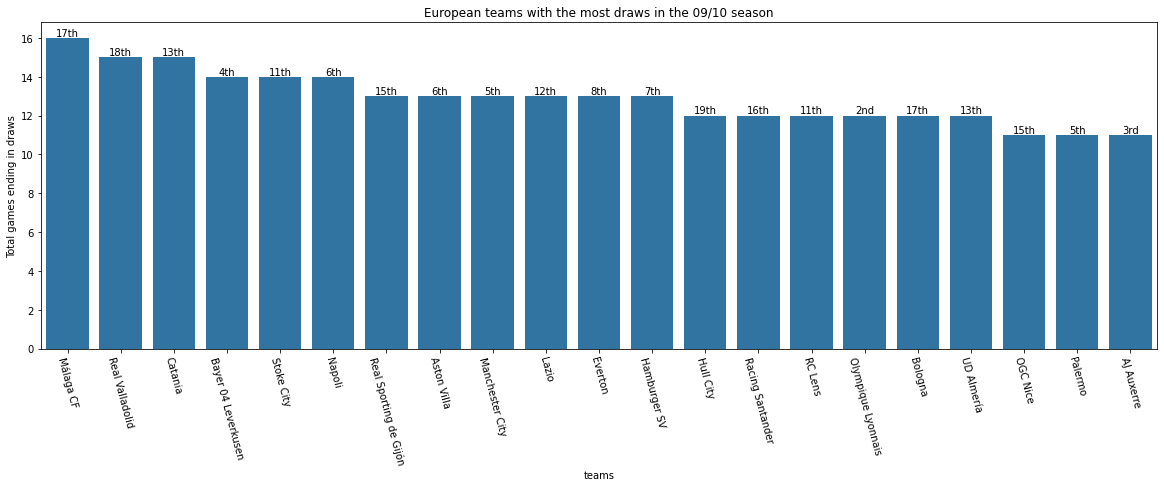

In [31]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["D"], ascending=False)[:21],x="team_name", y="D",color=base_color)
plt.title('European teams with the most draws in the 09/10 season')
plt.ylabel("Total games ending in draws")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["D"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["D"], ascending=False)[:21]["D"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [11]:
seasons_09_10.sort_values(by=["D"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
16,9864,Málaga CF,38,5,2,8,8,6,9,7,15,16,37,42,48,-6,1.11,1.26
17,10281,Real Valladolid,38,4,3,8,7,7,9,7,16,15,36,37,62,-25,0.97,1.63
12,8530,Catania,38,8,2,7,8,4,9,10,13,15,45,44,45,-1,1.16,1.18
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,1.91,1.12
10,10194,Stoke City,38,7,4,6,8,6,7,11,13,14,47,34,48,-14,0.89,1.26
5,9875,Napoli,38,9,6,8,6,2,7,15,9,14,59,50,43,7,1.32,1.13
14,9869,Real Sporting de Gijón,38,7,2,7,6,5,11,9,16,13,40,36,51,-15,0.95,1.34
5,10252,Aston Villa,38,8,9,8,5,3,5,17,8,13,64,52,39,13,1.37,1.03
4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28,1.92,1.18
11,8543,Lazio,38,5,6,6,7,8,6,11,14,13,46,39,43,-4,1.03,1.13



- Stoke City beats other teams both in England for the team with most drawn matches with (14) games.
- In Serie A Catania has the most draws with (15).
- In french ligue 1 RC Lens and Olympique Lyonnais top the list of teams in france with the most amount of draws with (12) each.
- Bayer 04 Leverkusen has the most draws in the German Bundesliga with (15) games.
- Malaga CF is the team with most draws in the spanish laliga with (16) games.

> <br/> Malaga CF top the list of teams with the most amount of matches ending in draws (16).<br/><br/>

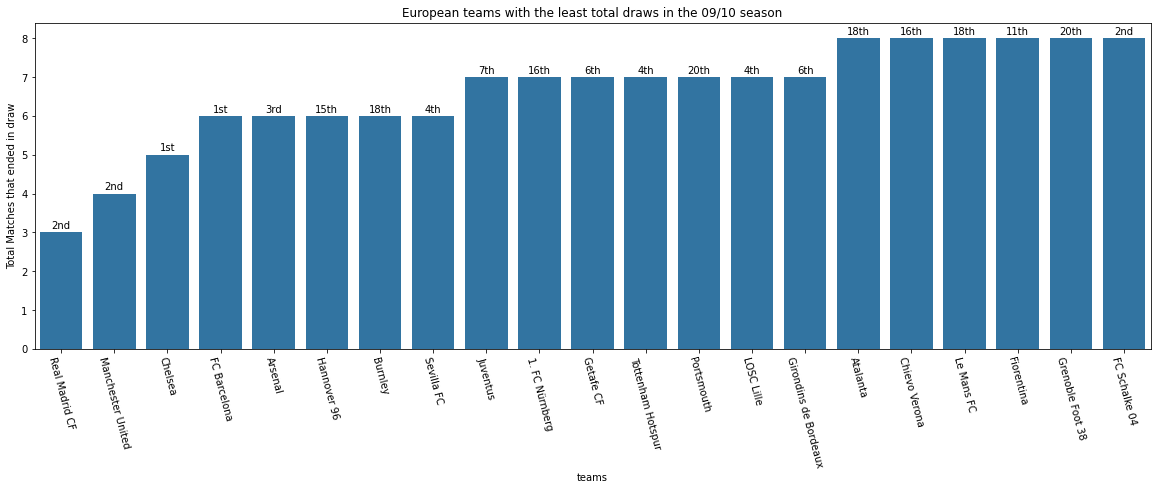

In [24]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["D"], ascending=True)[:21],x="team_name", y="D",color=base_color)
plt.title('European teams with the least total draws in the 09/10 season')
plt.ylabel("Total Matches that ended in draw")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["D"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["D"], ascending=True)[:21]["D"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [12]:
seasons_09_10.sort_values(by=["D"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42,2.18,1.08
14,9904,Hannover 96,34,5,4,4,2,8,11,9,19,6,33,43,67,-24,1.26,1.97
17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40,1.11,2.16
3,8302,Sevilla FC,38,10,9,6,0,3,10,19,13,6,63,65,49,16,1.71,1.29
6,9885,Juventus,38,9,7,4,3,6,9,16,15,7,55,55,56,-1,1.45,1.47
15,8165,1. FC Nürnberg,34,5,3,4,3,8,11,8,19,7,31,32,58,-26,0.94,1.71



- Man Utd tops teams in England with the least drawn matches of (4) games.
- In Serie A Atalanta, Chievo Verona and Florentina has the joint least draws with (8).
- In french ligue 1 LOSC Lille and Girondins de Bordeaux top teams in france with the least amount of draws with (7) each.
- Hannover 96 has the least draws in the German Bundesliga with (6) games.
- Real Madrid CF is the team with least draws in the spanish laliga with (3) games.

> <br/> Real Madrid CF is the team with the least amount of matches ending in draws (3).<br/><br/>

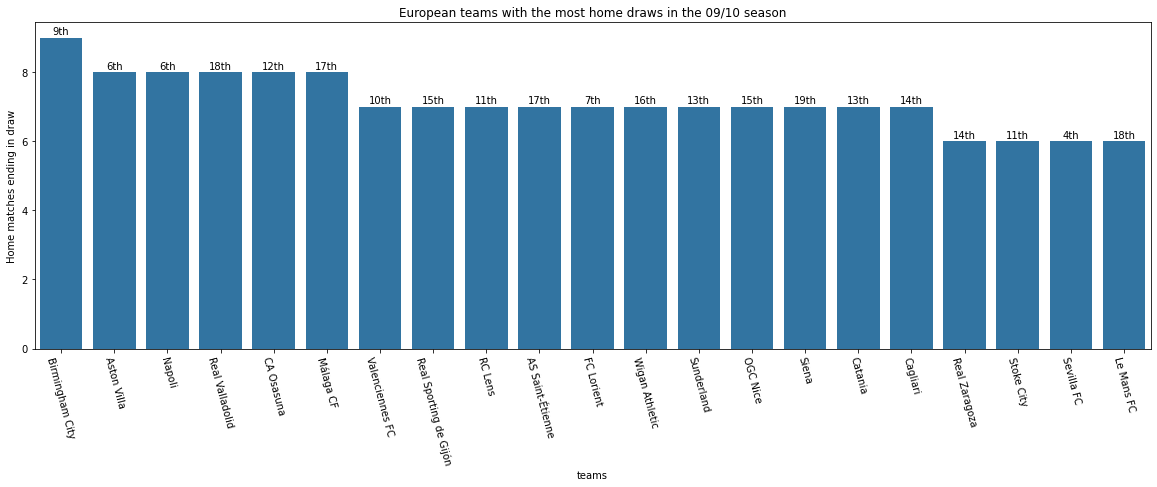

In [25]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["HD"], ascending=False)[:21],x="team_name", y="HD",color=base_color)
plt.title('European teams with the most home draws in the 09/10 season')
plt.ylabel("Home matches ending in draw")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["HD"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["HD"], ascending=False)[:21]["HD"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [13]:
seasons_09_10.sort_values(by=["HD"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
8,8658,Birmingham City,38,8,5,9,2,2,12,13,14,11,50,38,47,-9,1.00,1.24
5,10252,Aston Villa,38,8,9,8,5,3,5,17,8,13,64,52,39,13,1.37,1.03
5,9875,Napoli,38,9,6,8,6,2,7,15,9,14,59,50,43,7,1.32,1.13
17,10281,Real Valladolid,38,4,3,8,7,7,9,7,16,15,36,37,62,-25,0.97,1.63
11,8371,CA Osasuna,38,7,4,8,2,4,13,11,17,10,43,37,46,-9,0.97,1.21
16,9864,Málaga CF,38,5,2,8,8,6,9,7,15,16,37,42,48,-6,1.11,1.26
9,9873,Valenciennes FC,38,7,7,7,3,5,9,14,14,10,52,50,50,0,1.32,1.32
14,9869,Real Sporting de Gijón,38,7,2,7,6,5,11,9,16,13,40,36,51,-15,0.95,1.34
10,8588,RC Lens,38,9,3,7,5,3,11,12,14,12,48,40,44,-4,1.05,1.16
16,9853,AS Saint-Étienne,38,5,5,7,3,7,11,10,18,10,40,27,45,-18,0.71,1.18



- Birmingham tops teams in England with the most home draws of (9) games.
- In Serie A Napoli is the team with the most home draws of (8) games.
- In french ligue 1 LOSC Lille and Girondins de Bordeaux top teams in france with the most amount of draws with (7) each.
- SV Werder Bremen, Hamburger SV, 1. FSV Mainz 05,TSG 1899 Hoffenheim, and 1. FC Köln all have joint most draws in the German Bundesliga with (6) games.
- Real Valadolid, CA Osasuna and Malaga CF are the teams with most home draws in the spanish laliga with () games.

> <br/> Birmingham tops the list of teams with the most home matches that end in draws with (9) games.<br/><br/>

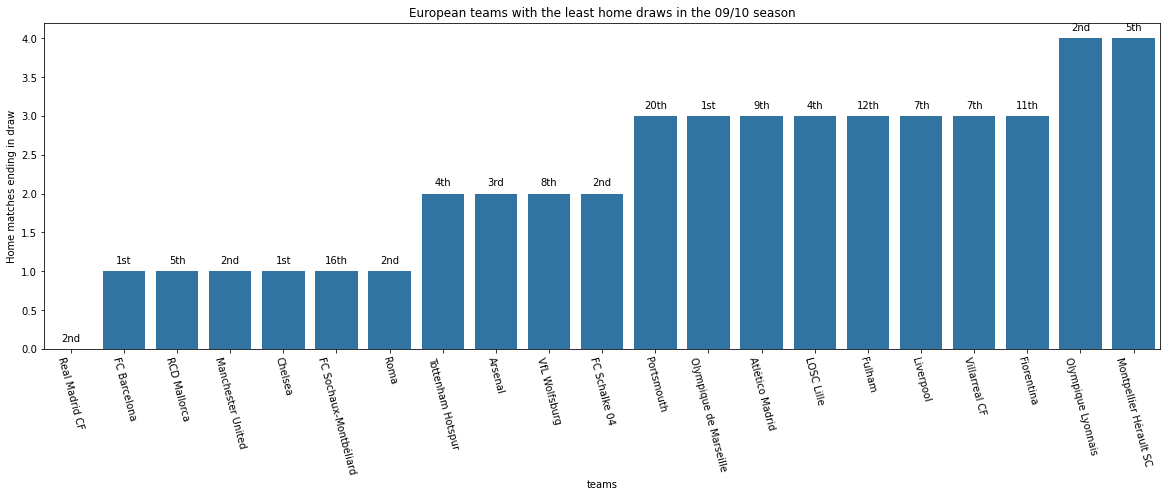

In [11]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["HD"], ascending=True)[:21],x="team_name", y="HD",color=base_color)
plt.title('European teams with the least home draws in the 09/10 season')
plt.ylabel("Home matches ending in draw")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["HD"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["HD"], ascending=True)[:21]["HD"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [14]:
seasons_09_10.sort_values(by=["HD"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
4,8661,RCD Mallorca,38,15,3,1,7,3,9,18,12,8,62,59,44,15,1.55,1.16
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
15,9874,FC Sochaux-Montbéliard,38,8,3,1,7,10,9,11,19,8,41,28,52,-24,0.74,1.37
1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27,1.79,1.08
3,8586,Tottenham Hotspur,38,14,7,2,5,3,7,21,10,7,70,67,41,26,1.76,1.08
2,9825,Arsenal,38,15,8,2,4,2,7,23,9,6,75,83,41,42,2.18,1.08
7,8721,VfL Wolfsburg,34,7,7,2,6,8,4,14,12,8,50,64,58,6,1.88,1.71



- Man Utd and Chelsea Fc tops teams in England with the least Home draws of (1).
- In Serie A roma is the team with the least amount of Home draws of (1).
- In french ligue 1 FC Sochaux-Montbéliard top teams in france with the least amount of draws in its stadium with (1).
- Wolfsburg and Schalke 04 both have joint least home draws in the German Bundesliga with (3) games.
- Real Madrid is the team with least home draws in the spanish laliga with (0).

> <br/> Real Madrid tops the list of teams with the most home matches that end in draws which is **NONE** .<br/><br/>

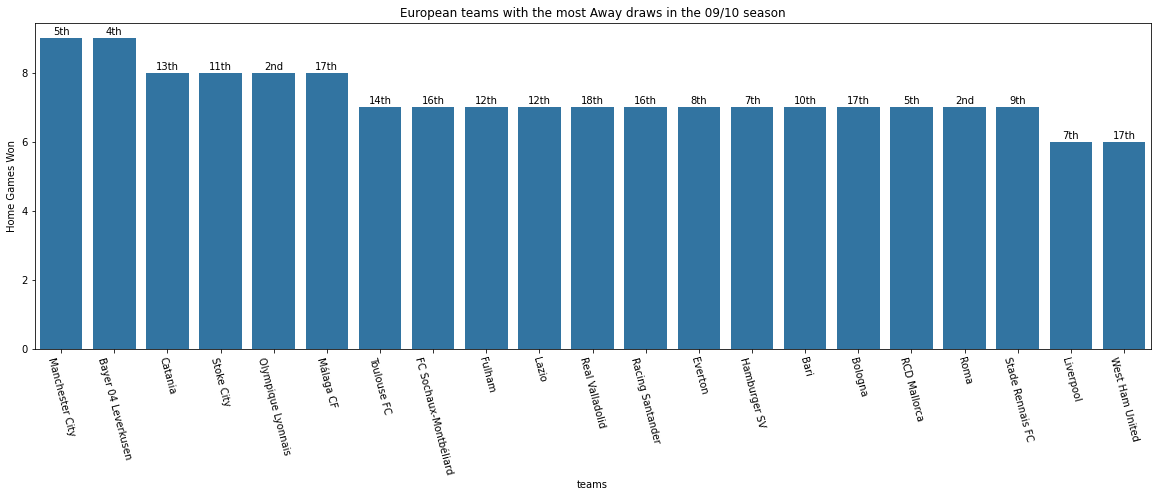

In [12]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["AD"], ascending=False)[:21],x="team_name", y="AD",color=base_color)
plt.title('European teams with the most Away draws in the 09/10 season')
plt.ylabel("Amount of Away draws")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["AD"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["AD"], ascending=False)[:21]["AD"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [15]:
seasons_09_10.sort_values(by=["AD"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28,1.92,1.18
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,1.91,1.12
12,8530,Catania,38,8,2,7,8,4,9,10,13,15,45,44,45,-1,1.16,1.18
10,10194,Stoke City,38,7,4,6,8,6,7,11,13,14,47,34,48,-14,0.89,1.26
1,9748,Olympique Lyonnais,38,12,8,4,8,3,3,20,6,12,72,64,38,26,1.68,1.00
16,9864,Málaga CF,38,5,2,8,8,6,9,7,15,16,37,42,48,-6,1.11,1.26
13,9941,Toulouse FC,38,8,4,4,7,7,8,12,15,11,47,36,36,0,0.95,0.95
15,9874,FC Sochaux-Montbéliard,38,8,3,1,7,10,9,11,19,8,41,28,52,-24,0.74,1.37
11,9879,Fulham,38,11,1,3,7,5,11,12,16,10,46,39,46,-7,1.03,1.21
11,8543,Lazio,38,5,6,6,7,8,6,11,14,13,46,39,43,-4,1.03,1.13



- Man City FC tops teams in England with the most Away draws of (9).
- In Serie A Catania is the team with the most amount of Away draws with (9).
- In french ligue 1 Olympique Lyonnais top teams in france with the most amount of Away draws with (8).
- Bayer 04 Leverkusen are joint top of teams with Away draws in all of europe and the most in the German Bundesliga with (9) games.
- Malaga CF is the team with the most Away draws in the spanish laliga with (8).

> <br/> Man City FC and Bayer 04 Leverkusen both tops the list of teams with the most Away matches in all of europe with (9).<br/><br/>

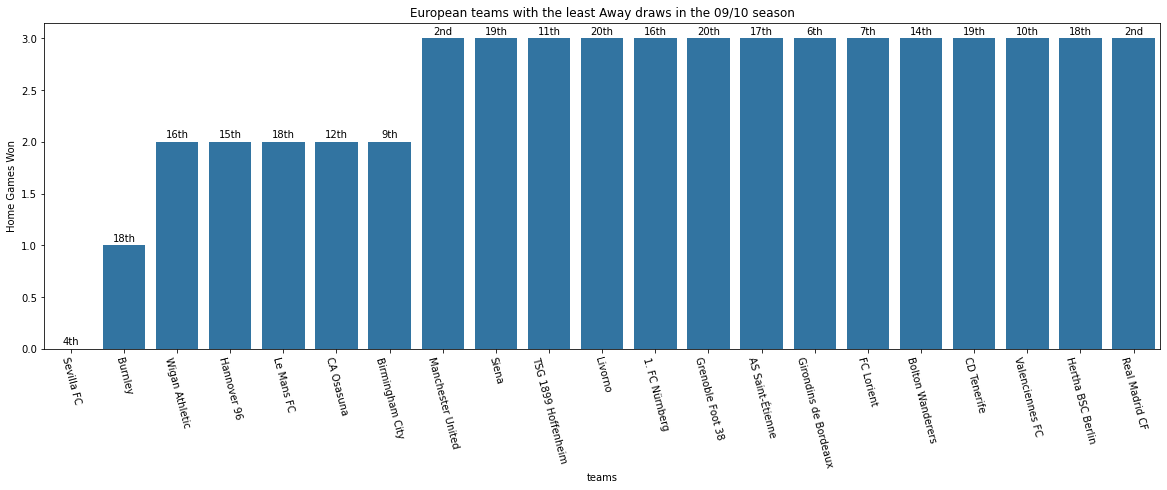

In [13]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["AD"], ascending=True)[:21],x="team_name", y="AD",color=base_color)
plt.title('European teams with the least Away draws in the 09/10 season')
plt.ylabel("Amount of Away draws")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["AD"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["AD"], ascending=True)[:21]["AD"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.04,vpct_string,ha="center",color="black")

In [17]:
seasons_09_10.sort_values(by=["AD"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
3,8302,Sevilla FC,38,10,9,6,0,3,10,19,13,6,63,65,49,16,1.71,1.29
17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40,1.11,2.16
15,8528,Wigan Athletic,38,6,3,7,2,6,14,9,20,9,36,37,79,-42,0.97,2.08
14,9904,Hannover 96,34,5,4,4,2,8,11,9,19,6,33,43,67,-24,1.26,1.97
17,8682,Le Mans FC,38,6,2,6,2,7,15,8,22,8,32,36,59,-23,0.95,1.55
11,8371,CA Osasuna,38,7,4,8,2,4,13,11,17,10,43,37,46,-9,0.97,1.21
8,8658,Birmingham City,38,8,5,9,2,2,12,13,14,11,50,38,47,-9,1.00,1.24
1,10260,Manchester United,38,16,11,1,3,2,5,27,7,4,85,86,28,58,2.26,0.74
18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27,1.05,1.76
10,8226,TSG 1899 Hoffenheim,34,5,6,6,3,6,8,11,14,9,42,44,42,2,1.29,1.24



- Burnley tops teams in England with the least amount of Away draws of (1).
- In Serie A Siena, and Livorno are top joint teams with the least amount of Away draws with (3).
- In french ligue 1 Le Mans top teams in france with the least amount of Away draws with (2).
- Hannover 96 is the team with the least amount of Away draws in the German Bundesliga with (2) games.
- Sevilla FC is the team with the least amount Away draws in the spanish laliga with (0).

> <br/> Sevilla FC tops the list of teams with the least amount of Away draws in all of europe with **NONE**.<br/><br/>

## Notes/Facts from the bar-chart Visualizations On Matches Draw
#### The essence of bar-charts above is to assist me and others have a clear understanding of how the teams in the top 5 leagues performed using Matches Drwan in total, at home and finally away from home.


> - Teams that won 9 games and below are within relegation zones.
> - Teams that won 20 games and above mostly in the champions league and Europa league spots (1-6). 
> - in all of europe, Fc Barcelona  and Real Madrid CF are the teams with the most wins with (31) wins each also they both have same number of home matches won and Away matches won.
> - in all of europe, 2 teams with least equal amount of games won in Grenoble Foot 38 and Hertha BSC Berlin with (5) games each
.<br/><br/>

**COMING UP NEXT :** THE NEXT SLIDES INCLUDES CHARTS FOR LOSES AMONGST EUROPEAN TOP SIDES


# Loses
#### In this section we will be gaining insights on how Europe's top sides performs using the amount of games that in loses in the 2009-2010 season. The amount of Games that ended in Loses in their respective stadiums and the loses in their opponent stadium will also be observed.

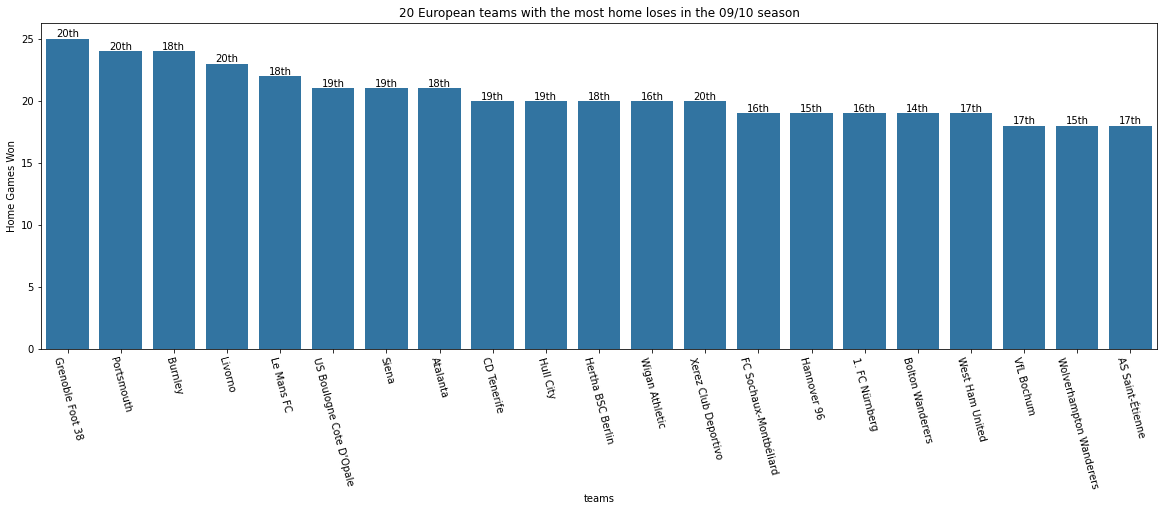

In [14]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["L"], ascending=False)[:21],x="team_name", y="L",color=base_color)
plt.title('20 European teams with the most home loses in the 09/10 season')
plt.ylabel("Total matches lost")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["L"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["L"], ascending=False)[:21]["L"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [18]:
seasons_09_10.sort_values(by=["L"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30,0.82,1.61
19,8462,Portsmouth,38,5,2,3,4,11,13,7,24,7,28,34,66,-32,0.89,1.74
17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40,1.11,2.16
19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34,0.71,1.61
17,8682,Le Mans FC,38,6,2,6,2,7,15,8,22,8,32,36,59,-23,0.95,1.55
18,4170,US Boulogne Cote D'Opale,38,4,3,5,5,10,11,7,21,10,31,31,62,-31,0.82,1.63
18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27,1.05,1.76
17,8524,Atalanta,38,7,2,5,3,7,14,9,21,8,35,37,53,-16,0.97,1.39
18,9867,CD Tenerife,38,8,1,6,3,5,15,9,20,9,36,40,74,-34,1.05,1.95
18,8667,Hull City,38,6,0,6,6,7,13,6,20,12,30,34,75,-41,0.89,1.97



- Burnley and Portsmouth are joint tops teams in England with the most amount of loses with (24).
- In Serie A Livorno are the team with the most amount of loses with (23).
- In french ligue 1 Grenoble Foot 38 in france with is the team with the most amount of loses with (25).
- Hertha BSC Berlin is the team with the most amount of loses in the German Bundesliga with (20).
- CD Tenerife and Xerez Cub Deportivo are the joint top teams with the most amount of loses in the spanish laliga with (20).

> <br/> Grenoble Foot 38 tops the list of teams with the most amount of loses in all of europe with (25) games.<br/><br/>

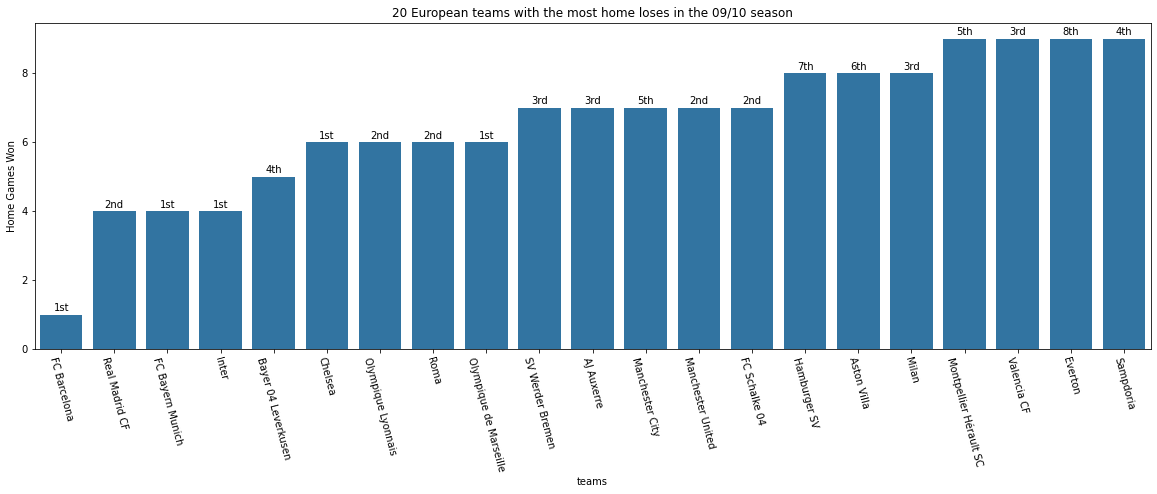

In [16]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["L"], ascending=True)[:21],x="team_name", y="L",color=base_color)
plt.title('20 European teams with the most home loses in the 09/10 season')
plt.ylabel("Total matches lost")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["L"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["L"], ascending=True)[:21]["L"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [19]:
seasons_09_10.sort_values(by=["L"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41,2.12,0.91
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,1.91,1.12
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
1,9748,Olympique Lyonnais,38,12,8,4,8,3,3,20,6,12,72,64,38,26,1.68,1.00
1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27,1.79,1.08
0,8592,Olympique de Marseille,38,14,9,3,6,2,4,23,6,9,78,69,36,33,1.82,0.95
2,8697,SV Werder Bremen,34,8,9,6,4,3,4,17,7,10,61,71,40,31,2.09,1.18



- Chelsea Fc is the team in England with the least amount of loses with (6).
- In Serie A Inter Milan is the team with the least amount of loses with (4).
- In french ligue 1 Olympique Lyonnais and Olympique Marseille are joint top teams with the least amount of loses with (6).
- Bayern Munich is the team with the least amount of loses in the German Bundesliga with (4).
- FC Barcelona is the team with the least amount of loses in the spanish laliga with (1).

> <br/> FC Barcelona  tops the list of teams with the least amount of loses in all of europe with (1).<br/><br/>

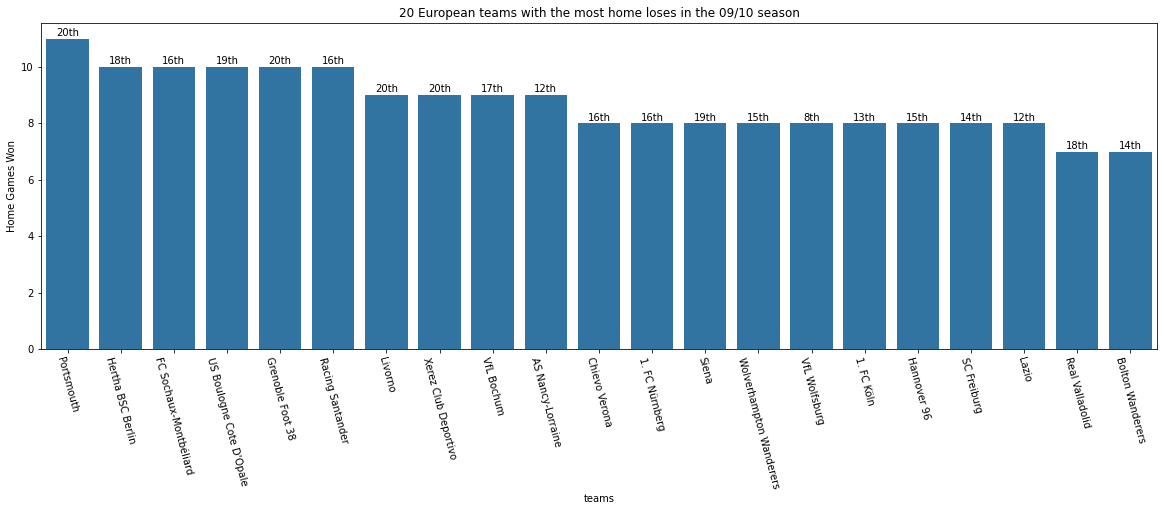

In [19]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["HL"], ascending=False)[:21],x="team_name", y="HL",color=base_color)
plt.title('20 European teams with the most home loses in the 09/10 season')
plt.ylabel("Amount Home matches lost")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["HL"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["HL"], ascending=False)[:21]["HL"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [20]:
seasons_09_10.sort_values(by=["HL"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
19,8462,Portsmouth,38,5,2,3,4,11,13,7,24,7,28,34,66,-32,0.89,1.74
17,8177,Hertha BSC Berlin,34,1,4,6,3,10,10,5,20,9,24,34,56,-22,1.00,1.65
15,9874,FC Sochaux-Montbéliard,38,8,3,1,7,10,9,11,19,8,41,28,52,-24,0.74,1.37
18,4170,US Boulogne Cote D'Opale,38,4,3,5,5,10,11,7,21,10,31,31,62,-31,0.82,1.63
19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30,0.82,1.61
15,8696,Racing Santander,38,4,5,5,7,10,7,9,17,12,39,42,59,-17,1.11,1.55
19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34,0.71,1.61
19,9868,Xerez Club Deportivo,38,6,2,4,6,9,11,8,20,10,34,38,66,-28,1.00,1.74
16,9911,VfL Bochum,34,2,4,6,4,9,9,6,18,10,28,33,64,-31,0.97,1.88
11,8481,AS Nancy-Lorraine,38,6,7,4,5,9,7,13,16,9,48,46,53,-7,1.21,1.39



- Portsmouth is the team in England with the most amount of Home loses with (11).
- In Serie A Livorno are the team with the most amount of Home loses with (9).
- In french ligue 1 US Boulogne Cote D'Opale, FC Sochaux-Montbéliard, Grenoble Foot 38 in france are the joint top teams with the most amount of Home loses with (10).
- Hertha BSC Berlin is the team with the most amount of Home loses in the German Bundesliga with (10).
- Racing Santander is the teams with the most amount of Home loses in the spanish laliga with (10).

> <br/> Portsmouth tops the list of teams with the most amount of Home loses in all of europe with (11).<br/><br/>

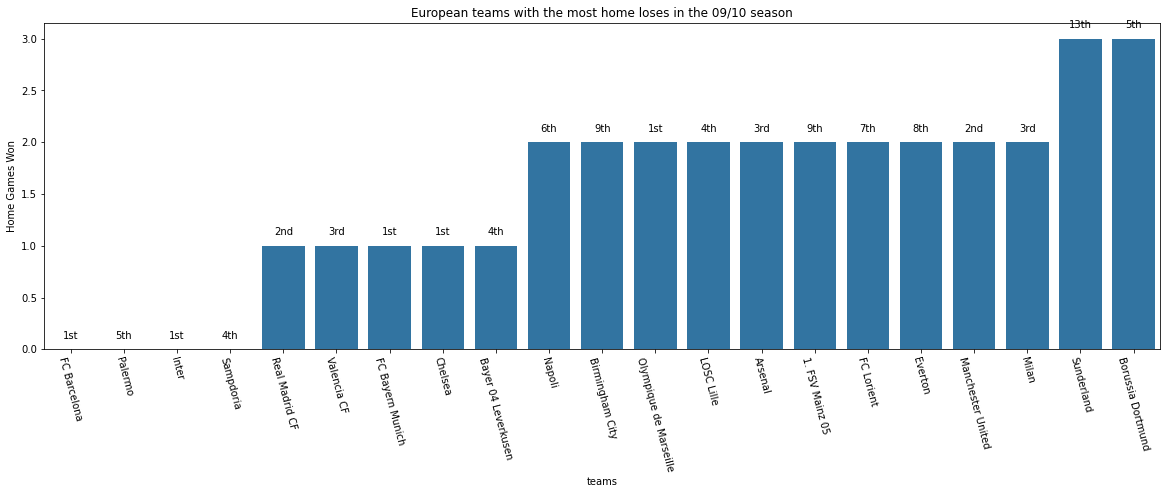

In [17]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["HL"], ascending=True)[:21],x="team_name", y="HL",color=base_color)
plt.title('European teams with the most home loses in the 09/10 season')
plt.ylabel("Amount Home matches lost")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["HL"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["HL"], ascending=True)[:21]["HL"]):
    vpct_string = "{}".format(standing(position+1))
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [21]:
seasons_09_10.sort_values(by=["HL"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
4,8540,Palermo,38,13,5,6,5,0,9,18,9,11,65,59,47,12,1.55,1.24
0,8636,Inter,38,15,9,4,6,0,4,24,4,10,82,75,34,41,1.97,0.89
3,9882,Sampdoria,38,13,6,6,4,0,9,19,9,10,67,49,41,8,1.29,1.08
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
2,10267,Valencia CF,38,13,8,5,3,1,8,21,9,8,71,59,40,19,1.55,1.05
0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41,2.12,0.91
0,8455,Chelsea,38,17,10,1,4,1,5,27,6,5,86,103,32,71,2.71,0.84
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,1.91,1.12
5,9875,Napoli,38,9,6,8,6,2,7,15,9,14,59,50,43,7,1.32,1.13



- Chelsea Fc is the team in England with the least amount of loses with (6).
- In Serie A Inter Milan is the team with the least amount of loses with (4).
- In french ligue 1 Olympique Lyonnais and Olympique Marseille are joint top teams with the least amount of loses with (6).
- Bayern Munich is the team with the least amount of loses in the German Bundesliga with (4).
- FC Barcelona is the team with the least amount of loses in the spanish laliga with (1).

> <br/> FC Barcelona  tops the list of teams with the least amount of loses in all of europe with (1).<br/><br/>
> Also We can see clearly that most of the teams in this category are within or are in european competition qualifying zones (Champions League or Europa League) except for the last 2 two teams (Sunderland and Borussia Dortmund) that are in the second half of the table standings.<br><br/>
> Camp Nou, Inter Milan's San Siro, Palermo, Sampdoria are sacred ground where it is dificult to win.<br/><br/>

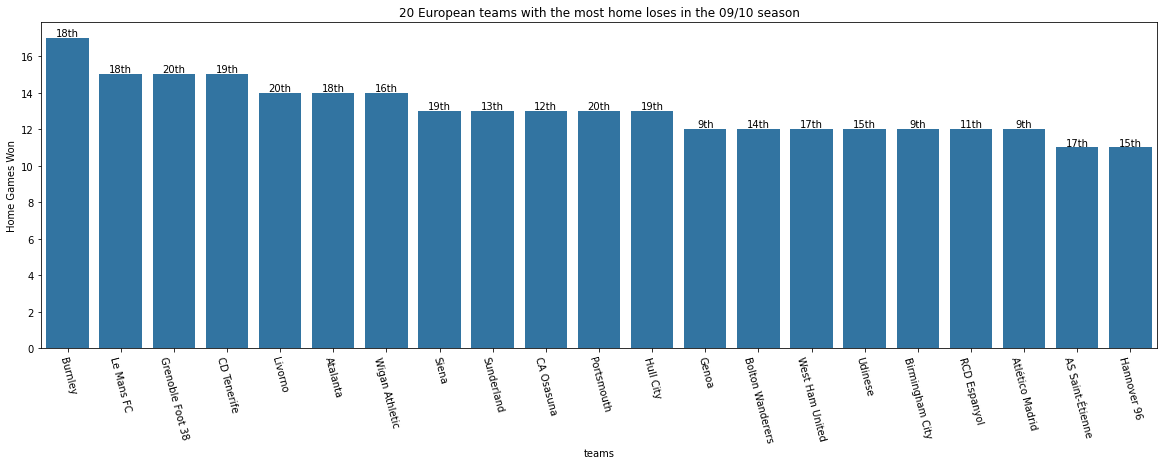

In [20]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["AL"], ascending=False)[:21],x="team_name", y="AL",color=base_color)
plt.title('20 European teams with the most Away loses in the 09/10 season')
plt.ylabel("Amount Away matches lost")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["AL"], ascending=False)[:21].index,seasons_09_10.sort_values(by=["AL"], ascending=False)[:21]["AL"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [22]:
seasons_09_10.sort_values(by=["AL"], ascending=False)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
17,8191,Burnley,38,7,1,5,1,7,17,8,24,6,30,42,82,-40,1.11,2.16
17,8682,Le Mans FC,38,6,2,6,2,7,15,8,22,8,32,36,59,-23,0.95,1.55
19,9855,Grenoble Foot 38,38,4,1,5,3,10,15,5,25,8,23,31,61,-30,0.82,1.61
18,9867,CD Tenerife,38,8,1,6,3,5,15,9,20,9,36,40,74,-34,1.05,1.95
19,8537,Livorno,38,5,2,5,3,9,14,7,23,8,29,27,61,-34,0.71,1.61
17,8524,Atalanta,38,7,2,5,3,7,14,9,21,8,35,37,53,-16,0.97,1.39
15,8528,Wigan Athletic,38,6,3,7,2,6,14,9,20,9,36,37,79,-42,0.97,2.08
18,8551,Siena,38,4,3,7,3,8,13,7,21,10,31,40,67,-27,1.05,1.76
12,8472,Sunderland,38,9,2,7,4,3,13,11,16,11,44,48,56,-8,1.26,1.47
11,8371,CA Osasuna,38,7,4,8,2,4,13,11,17,10,43,37,46,-9,0.97,1.21



- Burnley is the team in England with the most amount of Away loses with (17).
- In Serie A Livorno and Atalanta are the teams with the most amount of Away loses with (14).
- In french ligue 1 Grenoble Foot 38  and Le Mans FC are joint top teams with the most amount of Away loses with (15).
- Hannover 96 is the team with the most amount of Away loses in the German Bundesliga with (13).
- CD Tenerife is the team with the most amount of Away loses in the spanish laliga with (15).


> <br/> Burnley tops the list of teams with the most amount of Away loses in all of europe with (17) games.<br/><br/>


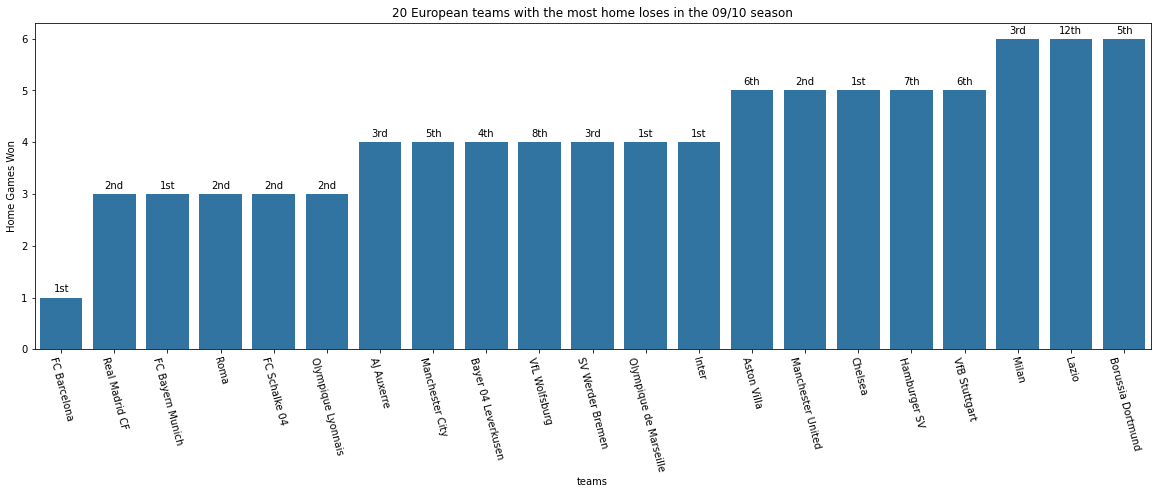

In [18]:
plt.figure(figsize=[20,6])
sb.barplot(data=seasons_09_10.sort_values(by=["AL"], ascending=True)[:21],x="team_name", y="AL",color=base_color)
plt.title('20 European teams with the Least Away loses in the 09/10 season')
plt.ylabel("Amount Away matches lost")
plt.xlabel("teams")
locs,labels =plt.xticks(rotation=285)
for loc,position,gs in zip(list(range(21)),seasons_09_10.sort_values(by=["AL"], ascending=True)[:21].index,seasons_09_10.sort_values(by=["AL"], ascending=True)[:21]["AL"]):
    #position = seasons_09_10[label.get_text()]
    vpct_string = "{}".format(standing(position+1))
    #print(gs)
    plt.text(loc,gs+.1,vpct_string,ha="center",color="black")

In [23]:
seasons_09_10.sort_values(by=["AL"], ascending=True)[:21]

,team_id,team_name,GP,HW,AW,HD,AD,HL,AL,W,L,D,P,F,A,+/-,Goals_scored_ratio_per_match,Goals_conceeded_ratio_per_match
0,8634,FC Barcelona,38,18,13,1,5,0,1,31,1,6,99,98,24,74,2.58,0.63
1,8633,Real Madrid CF,38,18,13,0,3,1,3,31,4,3,96,102,35,67,2.68,0.92
0,9823,FC Bayern Munich,34,12,8,4,6,1,3,20,4,10,70,72,31,41,2.12,0.91
1,8686,Roma,38,15,9,1,7,3,3,24,6,8,80,68,41,27,1.79,1.08
1,10189,FC Schalke 04,34,11,8,2,6,4,3,19,7,8,65,53,31,22,1.56,0.91
1,9748,Olympique Lyonnais,38,12,8,4,8,3,3,20,6,12,72,64,38,26,1.68,1.00
2,8583,AJ Auxerre,38,11,9,5,6,3,4,20,7,11,71,42,29,13,1.11,0.76
4,8456,Manchester City,38,12,6,4,9,3,4,18,7,13,67,73,45,28,1.92,1.18
3,8178,Bayer 04 Leverkusen,34,11,4,5,9,1,4,15,5,14,59,65,38,27,1.91,1.12
7,8721,VfL Wolfsburg,34,7,7,2,6,8,4,14,12,8,50,64,58,6,1.88,1.71



- Man City Fc is the team in England with the least amount of Away loses with (4).
- In Serie A Roma is the team with the least amount of Away loses with (3).
- In french ligue 1 Olympique Lyonnais is the team with the least amount of Away loses with (3).
- Bayern Munich and Schalke 04 are the joint top teams with the least amount of Away loses in the German Bundesliga with (3).
- FC Barcelona is the team with the least amount of loses in the spanish laliga with (1).

> <br/> FC Barcelona  tops the list of teams with the least amount of Away loses in all of europe with (1).<br/><br/>


## Notes/Facts from the bar-chart Visualizations On Matches Won
#### The essence of bar-charts above is to assist me and others have a clear understanding of how the teams in the top 5 leagues performed using Matches Won in total, at home and finally away from home.

> - Barcelona top teams with the least amount of loses win in the season with (1).
> - Grenoble Foot 38 top teams with the most loses in the season with (25) games.
> - Portmouth top teams with the most Home loses in the season with (11) games.
> - Barcelona, Inter Milan, Palermo, Sampdoria  are the team with the least Home loses in the season with (0) **NONE**.
> - Burnley top teams with the most Away loses in the season with (17) games.
> - Barcelona is the team with the least Away loses in the season with (1).


> # Thank You
>I will countinue with other season as time permits<br/><br/>